In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/train',  # Path to dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (normal/abnormal)
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/train/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save the model
model.save("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model.h5")

# Evaluate the model
def predict_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Normal" if prediction[0][0] > 0.5 else "Abnormal"

# Example usage:
# result = predict_image('test_image.jpg', model)
# print("Prediction:", result)


Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.5453 - loss: 1.0204 - val_accuracy: 0.4917 - val_loss: 0.7025
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.5406 - loss: 0.6904 - val_accuracy: 0.4917 - val_loss: 0.6962
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.5875 - loss: 0.6872 - val_accuracy: 0.5083 - val_loss: 0.7078
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.6349 - loss: 0.7014 - val_accuracy: 0.5000 - val_loss: 0.7186
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.6089 - loss: 0.6445 - val_accuracy: 0.4667 - val_loss: 0.9981
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 0.7427 - loss: 0.5404 - val_accuracy: 0.4583 - val_loss: 0.7149
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - accuracy: 0.7550 - loss: 0.5480 - val_accuracy: 0.4833 - val_loss: 1.0825
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.6746 - loss: 0.5773 - val_accuracy: 0.42

In [ ]:
# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test',  # Path to test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 79 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7689 - loss: 0.4806
Test Accuracy: 77.22%


In [ ]:
 result = predict_image('/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test/Normal/47.1.jpg', model)
 print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
Prediction: Normal


In [ ]:
 result = predict_image('/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test/Abnormal/47-1.jpg', model)
 print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Abnormal


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step


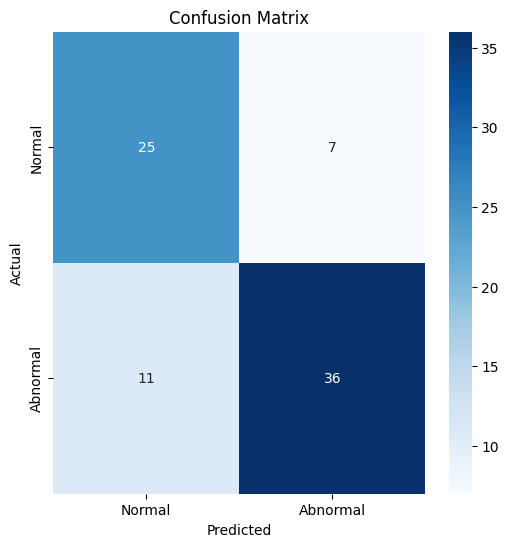

              precision    recall  f1-score   support

      Normal       0.69      0.78      0.74        32
    Abnormal       0.84      0.77      0.80        47

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.78      0.77      0.77        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions and true labels
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import cv2
from ultralytics import YOLO

# 1. Load YOLO Model
model_path = '/content/drive/MyDrive/Final Year Project/second/best.pt'  # Path to your trained YOLO model

# 2. Define Image Path and Output Folder
image_path = '/content/drive/MyDrive/Final Year Project/second/images/Copy of cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg'  # Path to your input image
output_folder = '/content/drive/MyDrive/Final Year Project/a_output'  # Where you want to save the extracted teeth

# 3. Create Output Directory
os.makedirs(output_folder, exist_ok=True)

# 4. Load Model and Predict
model = YOLO(model_path)
results = model.predict(source=image_path, save=False, conf=0.25)  # Run prediction on the single image

# 5. Extract Teeth from the Image
image_name = os.path.basename(image_path).split('.')[0]
image = cv2.imread(image_path)
image_height, image_width = image.shape[:2]

xray_folder = os.path.join(output_folder, image_name)
os.makedirs(xray_folder, exist_ok=True)

for result in results:  # There will only be one result (for the single image)
    for i, (bbox, conf, cls) in enumerate(zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls)):
        x_min, y_min, x_max, y_max = map(int, bbox)

        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(image_width, x_max)
        y_max = min(image_height, y_max)

        class_name = result.names[int(cls)]
        cropped_tooth = image[y_min:y_max, x_min:x_max]

        tooth_image_path = os.path.join(xray_folder, f"tooth_{class_name}.jpg")
        cv2.imwrite(tooth_image_path, cropped_tooth)

        print(f"Saved tooth {class_name} for {image_name} at {tooth_image_path}")

print(f"All detections processed and saved in: {output_folder}")


image 1/1 /content/drive/MyDrive/Final Year Project/second/images/Copy of cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 96.9ms
Speed: 2.7ms preprocess, 96.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Saved tooth 47 for Copy of cate1-00041_jpg at /content/drive/MyDrive/Final Year Project/a_output/Copy of cate1-00041_jpg/tooth_47.jpg
Saved tooth 48 for Copy of cate1-00041_jpg at /content/drive/MyDrive/Final Year Project/a_output/Copy of cate1-00041_jpg/tooth_48.jpg
Saved tooth 17 for Copy of cate1-00041_jpg at /content/drive/MyDrive/Final Year Project/a_output/Copy of cate1-00041_jpg/tooth_17.jpg
Saved tooth 46 for Copy of cate1-00041_jpg at /content/drive/MyDrive/Final Year Project/a_output/Copy of cate1-00041_jpg/tooth_46.jpg
Saved tooth 18 for Copy of c

In [ ]:
loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model.h5")

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/a_output',  # Path to test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model on the test dataset
test_loss, test_acc = loaded_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 32 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - accuracy: 0.7812 - loss: 0.5611
Test Accuracy: 78.12%


In [ ]:
import shutil
# Function to predict and segregate images
def segregate_images(source_folder, model):
    normal_folder = os.path.join(source_folder, '/content/drive/MyDrive/Final Year Project/a_output/normal')
    abnormal_folder = os.path.join(source_folder, '/content/drive/MyDrive/Final Year Project/a_output/abnormal')

    # Create directories if they don't exist
    os.makedirs(normal_folder, exist_ok=True)
    os.makedirs(abnormal_folder, exist_ok=True)

    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)

        if os.path.isfile(img_path):  # Ensure it's a file
            result=predict_image(img_path, model)
            if result == "Normal":
              shutil.copy(img_path, os.path.join(normal_folder, img_name))
            else:
              shutil.copy(img_path, os.path.join(abnormal_folder, img_name))

# Load saved model and segregate images
loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model.h5")
segregate_images('/content/drive/MyDrive/Final Year Project/a_output/Copy of cate1-00041_jpg', loaded_model)  # Change 'test_images' to the folder containing images to classify
print("Tooth segregated into 2 folders")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 210s 14s/step - accuracy: 0.5140 - loss: 0.8127 - val_accuracy: 0.4917 - val_loss: 0.6990
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.5099 - loss: 0.6964 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.5253 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.5954 - loss: 0.6718 - val_accuracy: 0.5333 - val_loss: 0.7199
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.6513 - loss: 0.6391 - val_accuracy: 0.5000 - val_loss: 0.6887
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.6625 - loss: 0.6608 - val_accuracy: 0.5000 - val_loss: 0.7659
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.6314 - loss: 0.6434 - val_accuracy: 0.4583 - val_loss: 0.7001
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.7088 - loss: 0.5929 - val_accuracy: 0.

Found 79 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


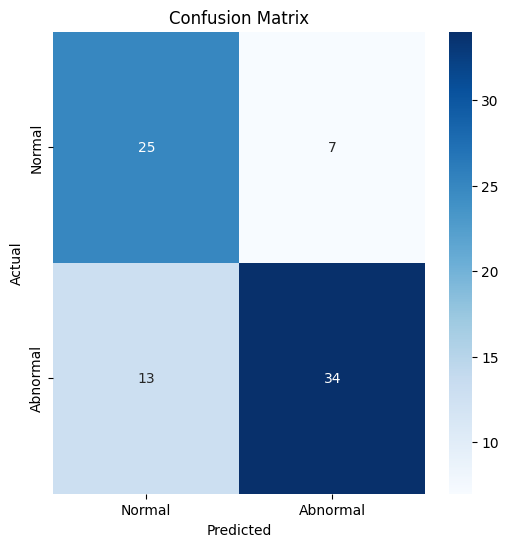

              precision    recall  f1-score   support

      Normal       0.66      0.78      0.71        32
    Abnormal       0.83      0.72      0.77        47

    accuracy                           0.75        79
   macro avg       0.74      0.75      0.74        79
weighted avg       0.76      0.75      0.75        79



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import shutil

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/train/',  # Path to dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (normal/abnormal)
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/train/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Use Functional API for a more flexible model
def build_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile the model
model = build_model((128, 128, 3))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save the model
model.save("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model_functional.h5")

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test',  # Path to test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Get predictions and true labels
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))

# Function to predict and segregate images
def segregate_images(source_folder, model):
    normal_folder = os.path.join(source_folder, 'normal')
    abnormal_folder = os.path.join(source_folder, 'abnormal')

    # Create directories if they don't exist
    os.makedirs(normal_folder, exist_ok=True)
    os.makedirs(abnormal_folder, exist_ok=True)

    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)

        if os.path.isfile(img_path):  # Ensure it's a file
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img_array = image.img_to_array(img)/255.0
            img_array = np.expand_dims(img_array, axis=0)
            prediction = model.predict(img_array)

            if prediction[0][0] > 0.5:
                shutil.copy(img_path, os.path.join(abnormal_folder, img_name))
            else:
                shutil.copy(img_path, os.path.join(normal_folder, img_name))

# Load saved model and segregate images
loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model_functional.h5")
segregate_images("/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test", loaded_model)  # Change 'test_images' to the folder containing images to classify


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = loaded_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7562 - loss: 0.4973
Test Accuracy: 74.68%
